<a href="https://colab.research.google.com/github/Siryeong/MachineLearning/blob/main/ml_hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
### data Download
!wget http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz

--2021-10-31 02:28:34--  http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz
Resolving www.iro.umontreal.ca (www.iro.umontreal.ca)... 132.204.26.36
Connecting to www.iro.umontreal.ca (www.iro.umontreal.ca)|132.204.26.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16168813 (15M) [application/x-gzip]
Saving to: ‘mnist.pkl.gz.1’

mnist.pkl.gz.1      100%[===================>]  15.42M  47.7MB/s    in 0.3s    

2021-10-31 02:28:35 (47.7 MB/s) - ‘mnist.pkl.gz.1’ saved [16168813/16168813]



In [4]:
import six.moves.cPickle as pickle
import gzip
import os
import numpy as np
#import scipy.misc
from PIL import Image

### definition
def load_data(dataset):
  ''' Loads the dataset

  :type dataset: string
  :param dataset: the path to the dataset (here MNIST)
  
  copied from http://deeplearning.net/ and revised by hchoi
  '''

  # Download the MNIST dataset if it is not present
  data_dir, data_file = os.path.split(dataset)
  if data_dir == "" and not os.path.isfile(dataset):
    # Check if dataset is in the data directory.
    new_path = os.path.join(
      os.path.split(__file__)[0],
      dataset
    )
    if os.path.isfile(new_path) or data_file == 'mnist.pkl.gz':
      dataset = new_path

  if (not os.path.isfile(dataset)) and data_file == 'mnist.pkl.gz':
    from six.moves import urllib
    origin = (
      'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
    )
    print('Downloading data from %s' % origin)
    urllib.request.urlretrieve(origin, dataset)

  print('... loading data')

  # Load the dataset
  with gzip.open(dataset, 'rb') as f:
    try:
      train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
    except:
      train_set, valid_set, test_set = pickle.load(f)
  return train_set, valid_set, test_set

In [5]:
train_set, val_set, test_set = load_data('mnist.pkl.gz')
train_x, train_y = train_set

print(train_x.shape)
print(train_y.shape)

... loading data
(50000, 784)
(50000,)


# tSNE

In [31]:
from sklearn.manifold import TSNE
result = TSNE().fit_transform(train_x)

In [32]:
import pandas as pd
path = 'drive/MyDrive/mnist_tsne_result.csv'
sne_data = pd.DataFrame(result, columns=['sne1', 'sne2'])
sne_data['label'] = train_y
sne_data.to_csv(path)

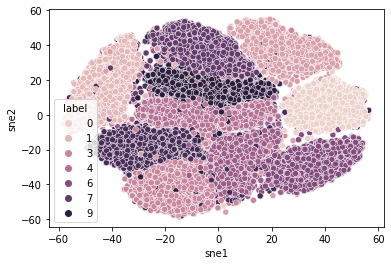

In [33]:
import seaborn as sns
sne_data = pd.read_csv(path)
sns.scatterplot(x='sne1', y='sne2', data=sne_data, hue='label')

# PCA

In [25]:
from sklearn.decomposition import PCA
result = PCA(n_components=2).fit_transform(train_x)

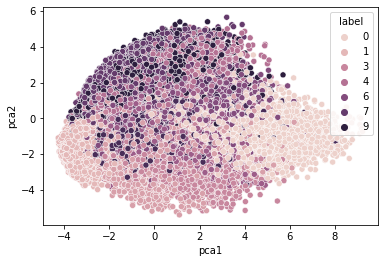

In [27]:
import pandas as pd
import seaborn as sns

pca_data = pd.DataFrame(result, columns=['pca1', 'pca2'])
pca_data['label'] = train_y

sns.scatterplot(x='pca1', y='pca2', data=pca_data, hue='label')